<a href="https://colab.research.google.com/github/Pineappleaki/ADS2-Tutorials/blob/main/ADS2_Formative_Assessment_completed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ADS2 Formative Assessment

The goal of this assessment is to demonstrate your Python and PySpark skills. There are three exercises. In the first two, you will be tested on data input/output, clustering analysis, use of functions, and visualisation. For the final exercise, you will also be tested on DataFrame loading, Spark SQL and DataFrame saving.

# Exercise 1 - Data Input/Output (10 marks)

For this exercise, you will use the California Housing Dataset seen in the PC labs. Use the version of this dataset found in the Google Colab "sample_data" folder.

`/content/sample_data/california_housing_train.csv`
`/content/sample_data/california_housing_test.csv`

Complete the following tasks:

1.   Using your preferred method–e.g. Pandas or csv reader—load the `california_housing_train.csv` from the file.
2.   Separate out the longitude, latitude, median_income and median_house_value columns, and discard the rest of the data.
3.   Normalise the longitude, latitude and median_income columns—for example, you could use the [StandardScalar from SciKit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Add these columns onto the rest of the data
4.   Save a new .csv file with the data. It should have seven columns:
    1. longitude
    2. latitude
    3. median_income
    4. normalised_longitude
    5. normalised_latitude
    6. normalised_income
    7. median_house_income



In [2]:
### Load the california_housing_train.csv
import pandas as pd

# Define file location
file_loc = "/content/sample_data/california_housing_train.csv"

# Read in the CSV file
df = pd.read_csv(file_loc)


In [3]:
### Discard all data except longitude, latitude, median_income and
### median_house_value

# Creating a df with only the desired columns.
df = df[["longitude", "latitude", "median_income", "median_house_value"]]

df.head()


,longitude,latitude,median_income,median_house_value
0,-114.31,34.19,1.4936,66900.0
1,-114.47,34.40,1.8200,80100.0
2,-114.56,33.69,1.6509,85700.0
3,-114.57,33.64,3.1917,73400.0
4,-114.57,33.57,1.9250,65500.0


In [4]:
### Normalise the longitude, latitude and median_income data, add these
### as new columns
from sklearn.preprocessing import normalize

norm_list = ["longitude", "latitude", "median_income"] #select feature names
to_normalize = df[norm_list] #specifying a df with only certain cols
normalized_data = normalize(to_normalize) #normalizing data with sklearn

col_names = norm_list # Define col_names base

# Ammend col_names to include "normalised"
for i in range(len(col_names)):
  col_names[i] = f'normalised_{col_names[i]}'

# Adding the normalised values to the df
df[col_names] = normalized_data
df.head(5)


,longitude,latitude,median_income,median_house_value,normalised_longitude,normalised_latitude,normalised_median_income
0,-114.31,34.19,1.4936,66900.0,-0.957988,0.286533,0.012517
1,-114.47,34.40,1.8200,80100.0,-0.957579,0.287767,0.015225
2,-114.56,33.69,1.6509,85700.0,-0.959283,0.282108,0.013824
3,-114.57,33.64,3.1917,73400.0,-0.959152,0.281626,0.026720
4,-114.57,33.57,1.9250,65500.0,-0.959528,0.281150,0.016122


In [5]:
### Save the data to a .csv file
# Using pandas .to_csv to save the file
df.to_csv("/content/sample_data/cali_housing_normalised.csv")


# Exercise 2 - Cluserting Analysis (10 marks)

In this exercise, you will analyse the housing data and create a classification system using the K Means algorithm.

Complete the following tasks:
1.   Create a KMeans model using sklearn, with six clusters. Fit the model to the normalised longitude, latitude and median_income data.
2.   Predict the clusters for each sample of data. Create a function that takes in all the samples for one cluster, and returns the mean, median and standard deviation of the median_house_value.
3.   Create a function which makes a scatter plot where the x-axis is longitude, the y-axis is latitude, the marker size represents median_income, and the marker colour denotes the cluster. Call the function with the sample data and predicted clusters.

In [6]:
### Fit a Kmeans clustering model to the normalised longitude,
### latitude and median_income data
from sklearn.cluster import KMeans

# Create a df of normalised values 
df_norm = df[norm_list]

# fitting kMeans to normalised df
kmeans = KMeans(n_clusters=6, random_state=0).fit(df_norm)

# Seperate labels and cluster centers
labels = kmeans.labels_
center = kmeans.cluster_centers_

# Add a column called "labels" for each cluster to the df
df["labels"] = labels

df.head(10)

,longitude,latitude,median_income,median_house_value,normalised_longitude,normalised_latitude,normalised_median_income,labels
0,-114.31,34.19,1.4936,66900.0,-0.957988,0.286533,0.012517,1
1,-114.47,34.40,1.8200,80100.0,-0.957579,0.287767,0.015225,1
2,-114.56,33.69,1.6509,85700.0,-0.959283,0.282108,0.013824,1
3,-114.57,33.64,3.1917,73400.0,-0.959152,0.281626,0.026720,1
4,-114.57,33.57,1.9250,65500.0,-0.959528,0.281150,0.016122,1
5,-114.58,33.63,3.3438,74000.0,-0.959148,0.281516,0.027991,1
6,-114.58,33.61,2.6768,82400.0,-0.959328,0.281402,0.022412,1
7,-114.59,34.83,1.7083,48500.0,-0.956682,0.290786,0.014262,2
8,-114.59,33.61,2.1782,58400.0,-0.959416,0.281403,0.018237,1
9,-114.60,34.83,2.1908,48100.0,-0.956626,0.290744,0.018288,2


In [16]:
### Create a function that calculates the mean, median and standard deviation
### of median_house_value for one cluster of data samples. Call it for each
### cluster and display the results

def return_stats(df, clu):
  """
  Prints out mean, median, std of chosen dataframe for specific cluster

  df: data frame
  clu: cluster to analyse

  returns: mean, median, std of chosen dataframe column "median_house_value"
  """

  df = df.loc[df["labels"] == clu] # Selecting the chosen cluster and assigning it as the df
  r = 2 # Set the rounding variable so numbers arent overwhelming
  
  mean = df["median_house_value"].mean() # Calculate mean
  median = df["median_house_value"].median() # Calculate median
  std = df["median_house_value"].std() # Calculate standard deviation

  # Display results
  print(f'\nStats for Cluster {clu}:\n',f'Mean: {round(mean,r)} \n',
        f'Median: {round(median,r)} \n',
        f'Standard Deviation: {round(std,r)}')
  
  # Return the "true values" for any additional calculations
  return mean, median, std

# Define the numbers of clusters
no_of_clusters = 6

# Call the function for each number of clusters
for cluster in range(no_of_clusters):
  print(return_stats(df, cluster))


Stats for Cluster 0:
 Mean: 244348.86 
 Median: 234500.0 
 Standard Deviation: 98526.79
(244348.86456467217, 234500.0, 98526.78566951535)

Stats for Cluster 1:
 Mean: 160237.09 
 Median: 147500.0 
 Standard Deviation: 79714.51
(160237.0909701994, 147500.0, 79714.51458669966)

Stats for Cluster 2:
 Mean: 130512.69 
 Median: 108050.0 
 Standard Deviation: 77752.95
(130512.69284994964, 108050.0, 77752.9501539505)

Stats for Cluster 3:
 Mean: 362650.29 
 Median: 352700.0 
 Standard Deviation: 98152.91
(362650.29065969953, 352700.0, 98152.91113108637)

Stats for Cluster 4:
 Mean: 229242.33 
 Median: 208900.0 
 Standard Deviation: 92376.17
(229242.3304436512, 208900.0, 92376.17048987435)

Stats for Cluster 5:
 Mean: 480676.83 
 Median: 500001.0 
 Standard Deviation: 57769.92
(480676.82554517133, 500001.0, 57769.92114376602)


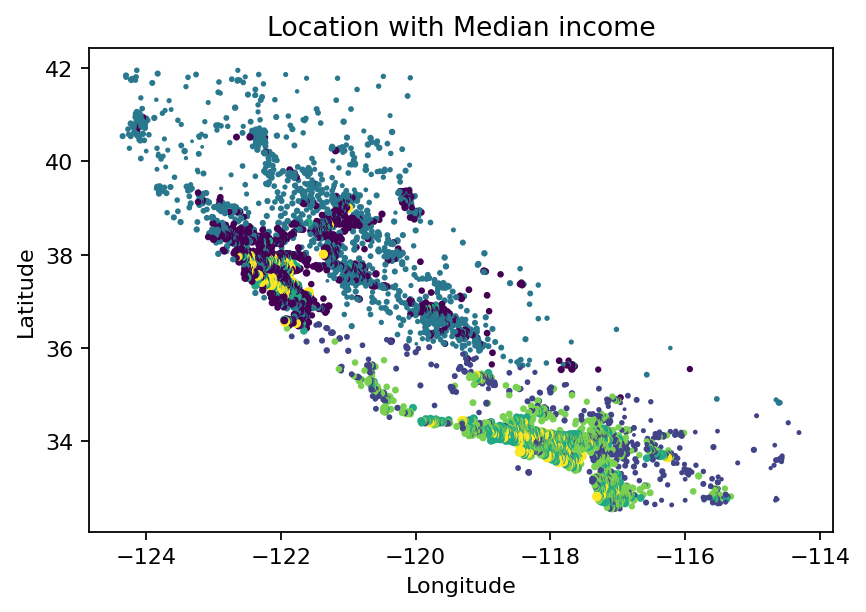

In [62]:
### Create a function that plots the longitude and latitude of each data sample
### Use the median_income for the marker size and cluster label for the colour
import matplotlib.pyplot as plt
def plotScatter(df):
  # Define variables (this was to attempt a legend)
  c = df['labels']

  # Define the plot
  fig, ax = plt.subplots(dpi = 160)
  ax.scatter(df['longitude'], df['latitude'], 
              c = c, s = df['median_income'])

  # Text / Annotations
  ax.set_title("Location with Median income")
  ax.set_xlabel("Longitude")
  ax.set_ylabel("Latitude")
  #ax.legend((0,1,2,3,4,5), ("0","1","2","3","4","5"))
  # I made an attempt to plot the legend but couldn't figure it out

plotScatter(df)


# Exercise 3 - PySpark Skills Test

In this exercise, you will use PySpark to process some data. Run the code to install PySpark, then complete these exercises:

1.   Load the `titanic3.csv` file into a DataFrame with an inferred schema. Show the first 20 lines,  and print the schema.
2.   Convert the `'Age'` column to `interger` type.
3.   Drop any rows that have null values.
4.   The buying power of £100 in 1912 is equivalent to £12,170.45 in 2022. Create a new column that shows the fare prices in today's money, and add it to the DataFrame.
5.   Save the new DataFrame to a .csv.

In [63]:
# Apache Spark uses Java, so first we must install that
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [64]:
# Download and unpack the latest version of Spark (3.2.0 as of writing)
!wget -q https://archive.apache.org/dist/spark/spark-3.2.0/spark-3.2.0-bin-hadoop3.2.tgz
!tar xf spark-3.2.0-bin-hadoop3.2.tgz

In [65]:
# Set up environment variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.0-bin-hadoop3.2"

In [66]:
# Install findspark, which helps python locate the psyspark module files
!pip install -q findspark
import findspark
findspark.init()

In [67]:
# Finally, we initialse a "SparkSession", which handles the computations
from pyspark.sql import SparkSession
spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [69]:
### Load the titanic3.csv file as a DataFrame. Display the data and schema
file_loc = "/content/titanic3.csv" # define file location

# Load in the csv
df = (spark
            .read
            .option('header','True')
            .option('inferSchema','True')
            .csv(file_loc))

#Display data and schema
df.show()
df.printSchema()

+--------+------+--------------------+------+---+-----------------------+-----------------------+-------+
|Survived|Pclass|                Name|   Sex|Age|Siblings/Spouses Aboard|Parents/Children Aboard|   Fare|
+--------+------+--------------------+------+---+-----------------------+-----------------------+-------+
|       0|     3|Mr. Owen Harris B...|  male| 22|                      1|                      0|   7.25|
|       1|     1|Mrs. John Bradley...|female| 38|                      1|                      0|71.2833|
|       1|     3|Miss. Laina Heikk...|female|  ?|                      0|                      0|  7.925|
|       1|     1|Mrs. Jacques Heat...|female| 35|                      1|                      0|   53.1|
|       0|     3|Mr. William Henry...|  male| 35|                      0|                      0|   8.05|
|       0|     3|     Mr. James Moran|  male| 27|                      0|                      0| 8.4583|
|       0|     1|Mr. Timothy J McC...|  male| 

In [76]:
### Convert the Age column to interger type
# Using the cast function we can 're-write' age as an integer
df = df.withColumn("Age", df["Age"].cast('int'))
df.printSchema()

root
 |-- Survived: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Siblings/Spouses Aboard: integer (nullable = true)
 |-- Parents/Children Aboard: integer (nullable = true)
 |-- Fare: double (nullable = true)



In [77]:
### Discard any rows with null values
df = df.dropna()

In [117]:
### Create a column with the fare prices in "today's money"
import pyspark.sql.functions as func

multiplier = 12170.45/100 # Caclulate the multiplier
df = df.withColumn("todays_money", func.round(df.Fare * multiplier,2) ) #Create new column
# As this is a simple calculation i computed it within the withColumn

df.show(5)

+--------+------+--------------------+------+---+-----------------------+-----------------------+-------+------------+
|Survived|Pclass|                Name|   Sex|Age|Siblings/Spouses Aboard|Parents/Children Aboard|   Fare|todays_money|
+--------+------+--------------------+------+---+-----------------------+-----------------------+-------+------------+
|       0|     3|Mr. Owen Harris B...|  male| 22|                      1|                      0|   7.25|      882.36|
|       1|     1|Mrs. John Bradley...|female| 38|                      1|                      0|71.2833|      8675.5|
|       1|     1|Mrs. Jacques Heat...|female| 35|                      1|                      0|   53.1|     6462.51|
|       0|     3|Mr. William Henry...|  male| 35|                      0|                      0|   8.05|      979.72|
|       0|     3|     Mr. James Moran|  male| 27|                      0|                      0| 8.4583|     1029.41|
+--------+------+--------------------+------+---

In [124]:
### Save the DataFrame as a .csv
df.toPandas().to_csv('titanic_completed.csv')